# Q2 and Q3
Change data point and now include data from two lines, Run your model from project 1 on this data, report a graph and print the loss

Epoch [100/1000], Loss: 6.0412
Epoch [200/1000], Loss: 5.2793
Epoch [300/1000], Loss: 5.0159
Epoch [400/1000], Loss: 4.9249
Epoch [500/1000], Loss: 4.8934
Epoch [600/1000], Loss: 4.8825
Epoch [700/1000], Loss: 4.8788
Epoch [800/1000], Loss: 4.8775
Epoch [900/1000], Loss: 4.8770
Epoch [1000/1000], Loss: 4.8768
Epoch [100/1000], Loss: 3.6976
Epoch [200/1000], Loss: 2.6291
Epoch [300/1000], Loss: 1.7581
Epoch [400/1000], Loss: 1.4449
Epoch [500/1000], Loss: 1.3822
Epoch [600/1000], Loss: 1.3576
Epoch [700/1000], Loss: 1.3365
Epoch [800/1000], Loss: 1.3157
Epoch [900/1000], Loss: 1.2956
Epoch [1000/1000], Loss: 1.2767


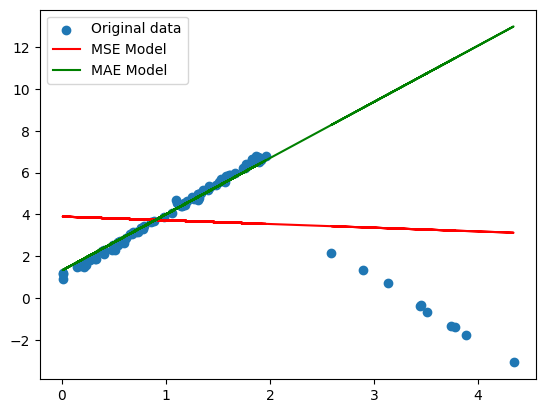

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data with an outlier
torch.manual_seed(42)  # For reproducibility

# First line: 90 samples
X1 = 2 * torch.rand(90, 1)  # Random input values between 0 and 2
y1 = 3 * X1 + 1 + 0.1 * torch.randn(90, 1)  # Linear relationship with some noise

# Second line: 10 samples (outliers), ensuring no overlap in the input range
X2 = 2.5 + 2 * torch.rand(10, 1)  # Adjusted to range from 2.5 to 4.5
y2 = -3 * X2 + 10 + 0.1 * torch.randn(10, 1)  # Different linear relationship with some noise

# Combine datasets
X = torch.cat((X1, X2), 0)
y = torch.cat((y1, y2), 0)

# Proceed with the rest of the code unchanged...

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Training loop function to generalize training process
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model with MSE loss
mse_model = LinearRegressionModel()
mse_criterion = nn.MSELoss()
mse_optimizer = optim.SGD(mse_model.parameters(), lr=0.01)

# print("Training model with MSE loss:")
train_model(mse_model, mse_criterion, mse_optimizer)

# Model with MAE loss
mae_model = LinearRegressionModel()
mae_criterion = nn.L1Loss()  # Use L1Loss for Mean Absolute Error
mae_optimizer = optim.SGD(mae_model.parameters(), lr=0.01)

# print("\nTraining model with MAE loss:")
train_model(mae_model, mae_criterion, mae_optimizer)

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), mse_model(X).detach().numpy(), 'r', label='MSE Model')
plt.plot(X.numpy(), mae_model(X).detach().numpy(), 'g', label='MAE Model')
plt.legend()
plt.show()


# Q4 
Use 3 layer MLP with relu in between

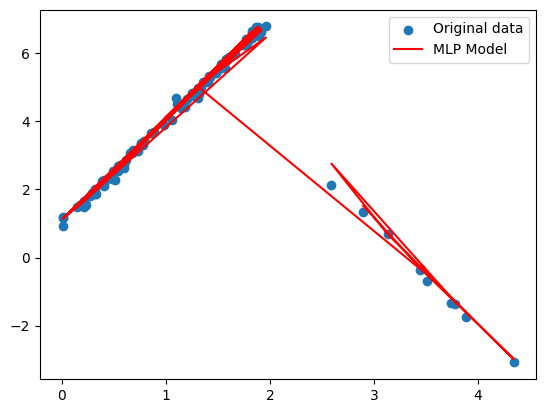

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, hidden_enc, hidden_dec):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(1, hidden_enc)  # Input layer to encoder layer
        self.fc2 = nn.Linear(hidden_enc, hidden_dec)  # Encoder layer to decoder layer
        self.fc3 = nn.Linear(hidden_dec, 1)  # Decoder layer to output layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Activation function after first layer
        x = self.relu(self.fc2(x))  # Activation function after second layer
        x = self.fc3(x)  # No activation after last layer (linear output)
        return x

# Generate synthetic data with an outlier (code unchanged)
torch.manual_seed(42)
X1 = 2 * torch.rand(90, 1)
y1 = 3 * X1 + 1 + 0.1 * torch.randn(90, 1)
X2 = 2.5 + 2 * torch.rand(10, 1)
y2 = -3 * X2 + 10 + 0.1 * torch.randn(10, 1)
X = torch.cat((X1, X2), 0)
y = torch.cat((y1, y2), 0)

# Initialize the MLP model with specified hidden layer sizes
mlp_model = MLPModel(hidden_enc=64, hidden_dec=32)  # Example sizes
criterion = nn.MSELoss()
optimizer = optim.SGD(mlp_model.parameters(), lr=0.01)

# Function to train the model (unchanged)
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Train the MLP model
train_model(mlp_model, criterion, optimizer)

# Plotting code will remain the same, using `mlp_model(X)` for predictions
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), mlp_model(X).detach().numpy(), 'r', label='MLP Model')
plt.legend()
plt.show()


# Q5 Experiment with different encoder, decoder

Hidden encoder: 1, Hidden decoder: 1, Loss: 4.9067


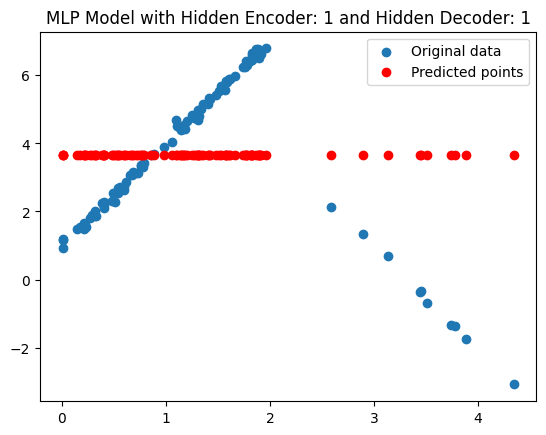

Hidden encoder: 1, Hidden decoder: 2, Loss: 2.7799


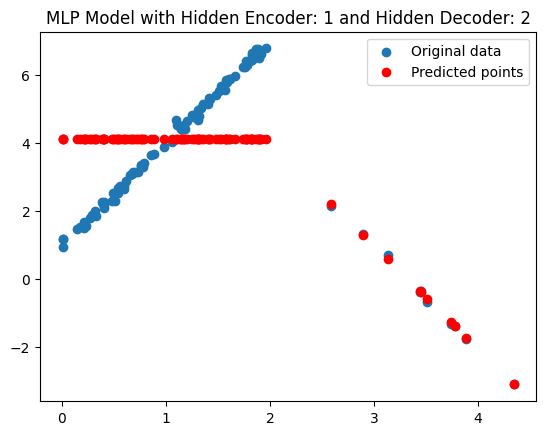

Hidden encoder: 2, Hidden decoder: 1, Loss: 4.9067


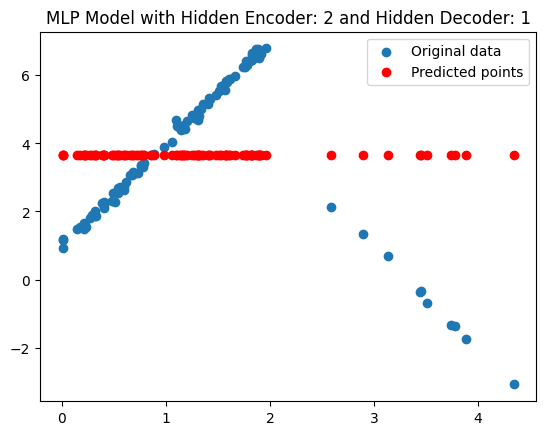

Hidden encoder: 2, Hidden decoder: 2, Loss: 4.9067


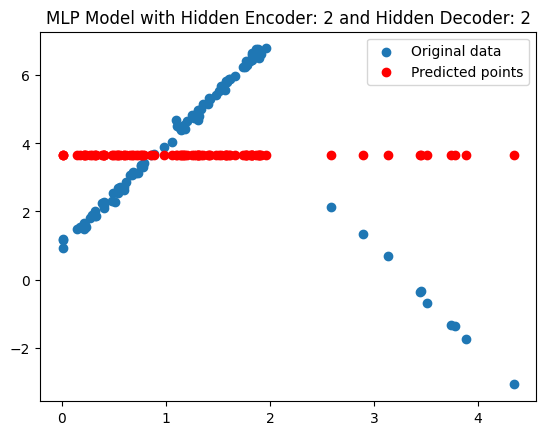

Hidden encoder: 10, Hidden decoder: 10, Loss: 0.0246


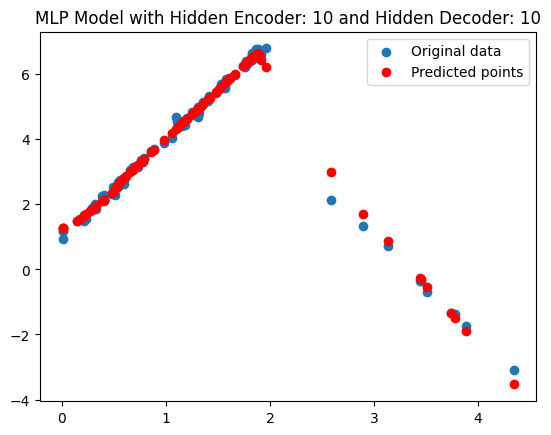

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, hidden_enc, hidden_dec):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(1, hidden_enc)
        self.fc2 = nn.Linear(hidden_enc, hidden_dec)
        self.fc3 = nn.Linear(hidden_dec, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate synthetic data with an outlier (code unchanged)
torch.manual_seed(42)
X1 = 2 * torch.rand(90, 1)
y1 = 3 * X1 + 1 + 0.1 * torch.randn(90, 1)
X2 = 2.5 + 2 * torch.rand(10, 1)
y2 = -3 * X2 + 10 + 0.1 * torch.randn(10, 1)
X = torch.cat((X1, X2), 0)
y = torch.cat((y1, y2), 0)

# Hyperparameters to experiment with
hidden_layers = [(1, 1), (1, 2), (2, 1), (2, 2), (10, 10)]

# Training function
def train_model(model, criterion, optimizer, X, y, num_epochs=1000):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss.item()

# Experiment with different hyperparameters
for hidden_enc, hidden_dec in hidden_layers:
    # Initialize the MLP model
    mlp_model = MLPModel(hidden_enc, hidden_dec)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(mlp_model.parameters(), lr=0.01)

    # Train the model and print the loss
    loss = train_model(mlp_model, criterion, optimizer, X, y)
    print(f'Hidden encoder: {hidden_enc}, Hidden decoder: {hidden_dec}, Loss: {loss:.4f}')

    # Plot the original data
    plt.scatter(X.numpy(), y.numpy(), label='Original data')

    # Plot the predicted points
    predicted = mlp_model(X).detach().numpy()
    plt.scatter(X.numpy(), predicted, label='Predicted points', color='red')
    plt.legend()
    plt.title(f'MLP Model with Hidden Encoder: {hidden_enc} and Hidden Decoder: {hidden_dec}')
    plt.show()


Hidden encoder: 1, Hidden decoder: 1, Loss: 4.2688


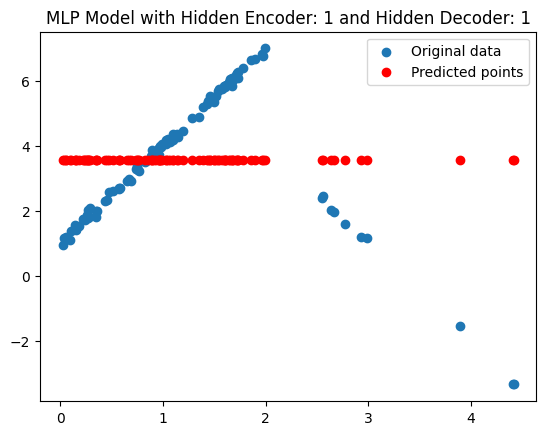

Hidden encoder: 1, Hidden decoder: 2, Loss: 2.7275


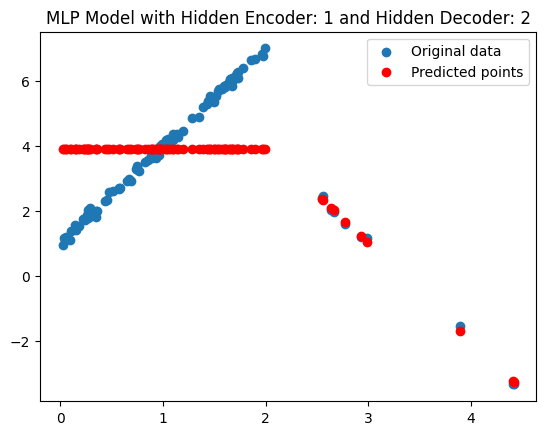

Hidden encoder: 2, Hidden decoder: 1, Loss: 4.2688


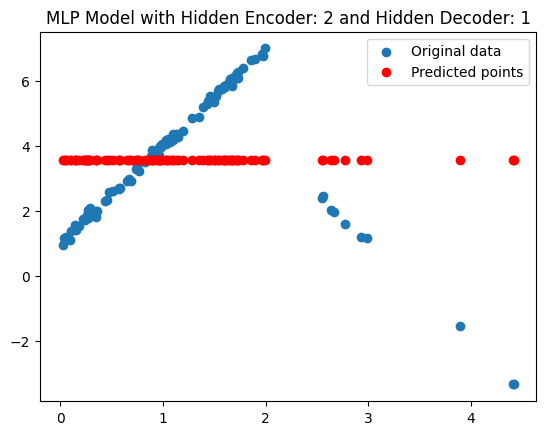

Hidden encoder: 2, Hidden decoder: 2, Loss: 0.0353


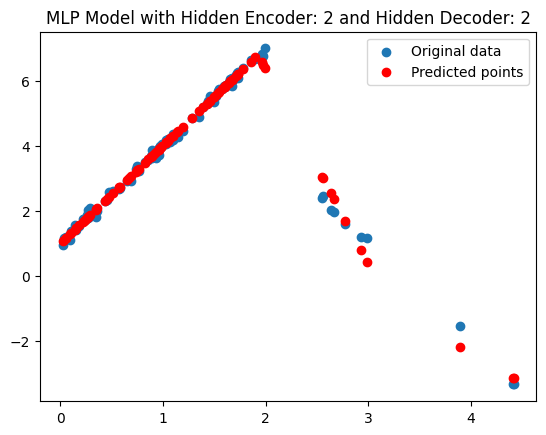

Hidden encoder: 10, Hidden decoder: 10, Loss: 0.0367


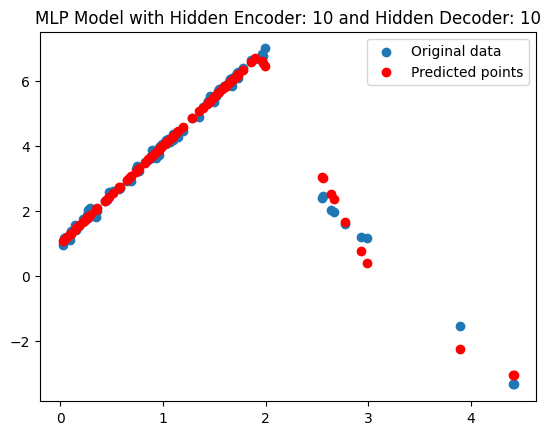

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, hidden_enc, hidden_dec):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(1, hidden_enc)
        self.fc2 = nn.Linear(hidden_enc, hidden_dec)
        self.fc3 = nn.Linear(hidden_dec, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate synthetic data with an outlier (code unchanged)
torch.manual_seed(40)
X1 = 2 * torch.rand(90, 1)
y1 = 3 * X1 + 1 + 0.1 * torch.randn(90, 1)
X2 = 2.5 + 2 * torch.rand(10, 1)
y2 = -3 * X2 + 10 + 0.1 * torch.randn(10, 1)
X = torch.cat((X1, X2), 0)
y = torch.cat((y1, y2), 0)

# Hyperparameters to experiment with
hidden_layers = [(1, 1), (1, 2), (2, 1), (2, 2), (10, 10)]

# Training function
def train_model(model, criterion, optimizer, X, y, num_epochs=1000):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss.item()

# Experiment with different hyperparameters
for hidden_enc, hidden_dec in hidden_layers:
    # Initialize the MLP model
    mlp_model = MLPModel(hidden_enc, hidden_dec)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(mlp_model.parameters(), lr=0.01)

    # Train the model and print the loss
    loss = train_model(mlp_model, criterion, optimizer, X, y)
    print(f'Hidden encoder: {hidden_enc}, Hidden decoder: {hidden_dec}, Loss: {loss:.4f}')

    # Plot the original data
    plt.scatter(X.numpy(), y.numpy(), label='Original data')

    # Plot the predicted points
    predicted = mlp_model(X).detach().numpy()
    plt.scatter(X.numpy(), predicted, label='Predicted points', color='red')
    plt.legend()
    plt.title(f'MLP Model with Hidden Encoder: {hidden_enc} and Hidden Decoder: {hidden_dec}')
    plt.show()


# Q6
Effect of random initialization

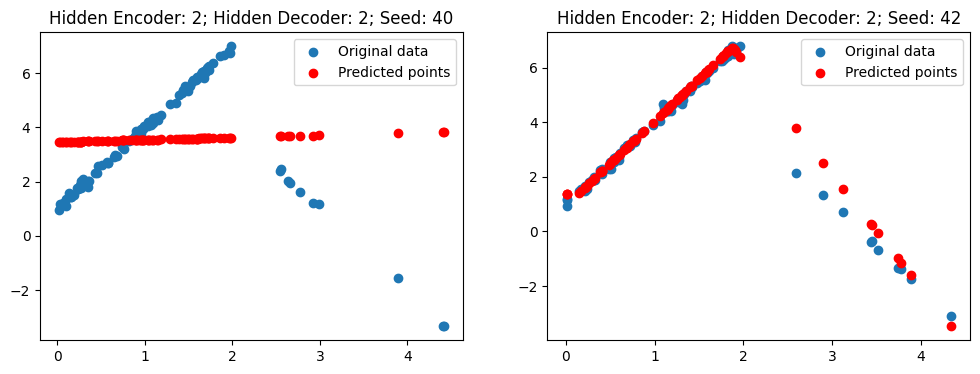

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, hidden_enc, hidden_dec):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(1, hidden_enc)
        self.fc2 = nn.Linear(hidden_enc, hidden_dec)
        self.fc3 = nn.Linear(hidden_dec, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training function
def train_model(model, criterion, optimizer, X, y, num_epochs=1000):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model

# Function to generate synthetic data with an outlier
def generate_data(seed):
    torch.manual_seed(seed)
    X1 = 2 * torch.rand(90, 1)
    y1 = 3 * X1 + 1 + 0.1 * torch.randn(90, 1)
    X2 = 2.5 + 2 * torch.rand(10, 1)
    y2 = -3 * X2 + 10 + 0.1 * torch.randn(10, 1)
    X = torch.cat((X1, X2), 0)
    y = torch.cat((y1, y2), 0)
    return X, y

# Experiment with different seeds
seeds = [40, 42]
hidden_enc, hidden_dec = 2, 2
results = []

# Train models with different seeds and collect results
for seed in seeds:
    X, y = generate_data(seed)
    mlp_model = MLPModel(hidden_enc, hidden_dec)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(mlp_model.parameters(), lr=0.01)
    trained_model = train_model(mlp_model, criterion, optimizer, X, y)
    y_pred = trained_model(X).detach()
    results.append((X, y, y_pred))

# Plot the results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, (X, y, y_pred) in enumerate(results):
    axes[i].scatter(X.numpy(), y.numpy(), label='Original data')
    axes[i].scatter(X.numpy(), y_pred.numpy(), label='Predicted points', color='red')
    axes[i].legend()
    axes[i].set_title(f'Hidden Encoder: 2; Hidden Decoder: 2; Seed: {seeds[i]}')
plt.show()

